<a href="https://colab.research.google.com/github/Rajitha1324/Analysis-using-Python/blob/master/House_Price_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Hello friends.
#loading the data file from local drive
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
#the necessary libraries wil be imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
#import it into a dataframe (make sure the filename matches the name of the uploaded file)
import io
main_data=pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
main_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
#lets quickly testing if the has the right type of data in it
main_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Lets computes a summary of statistics
main_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Data not having any NaN
Count_data=pd.DataFrame({'Total NA':main_data.isnull().sum()}).sort_values(by=['Total NA'])
Count_data['%']=Count_data['Total NA']/main_data.shape[1]
sum(Count_data['%'])

0.0

In [8]:
# Hurray! we have no missing values!
#Let's move forward wih removing the two coloumns id and date
main_data=main_data.drop(['id','date'],axis=1)

In [9]:
#Get the corrlation of the columns
main_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


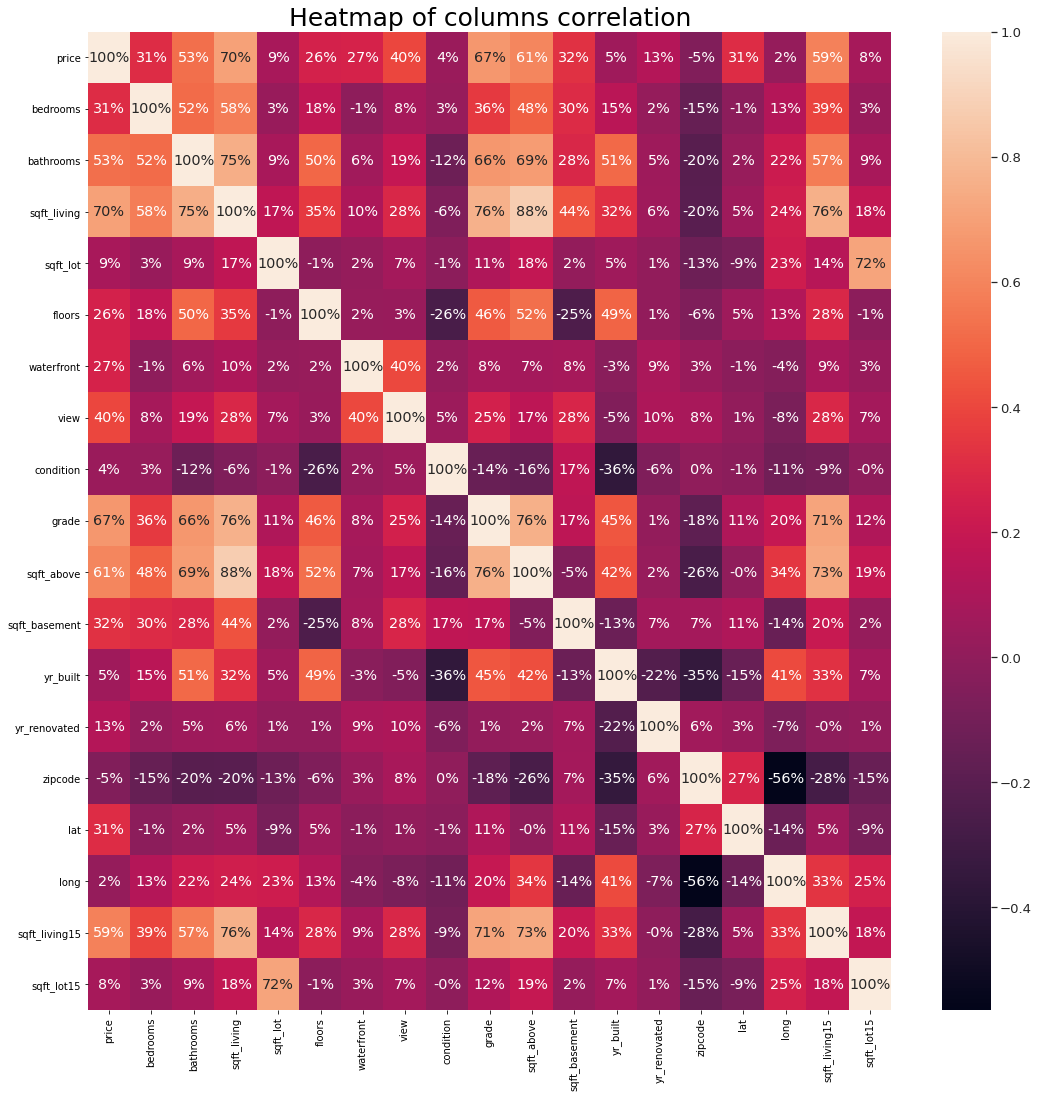

In [10]:
#Lets get a better visuaizaton by using heat map
plt.figure(figsize=(18,18))
plt.title('Heatmap of columns correlation',fontsize=25)
sns.set(font_scale=1.2)
sns.heatmap(main_data.corr(),annot=True,fmt='.0%')

Text(0.5, 1.0, 'Price vs sqft_living')

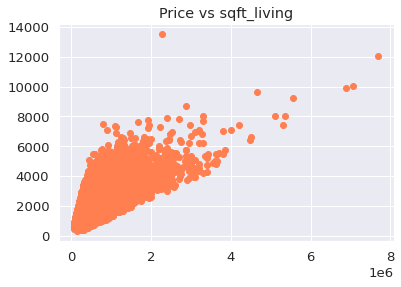

In [11]:
plt.scatter(main_data.price,main_data.sqft_living,c='coral')
plt.title('Price vs sqft_living')

In [12]:
#now lets see  freqency of bedroom, bathroom and floor
main_data['bedrooms'].value_counts().to_frame()

,bedrooms
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
8,13
0,13
9,6


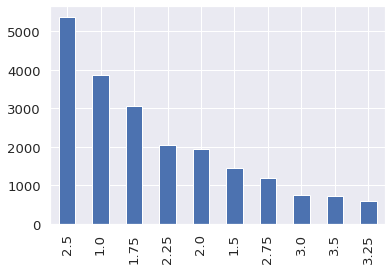

In [13]:
main_data['bathrooms'].value_counts()[:10,].plot(kind='bar')

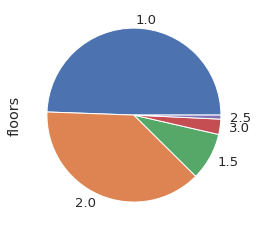

In [14]:
main_data['floors'].value_counts()[:5,].plot(kind='pie')

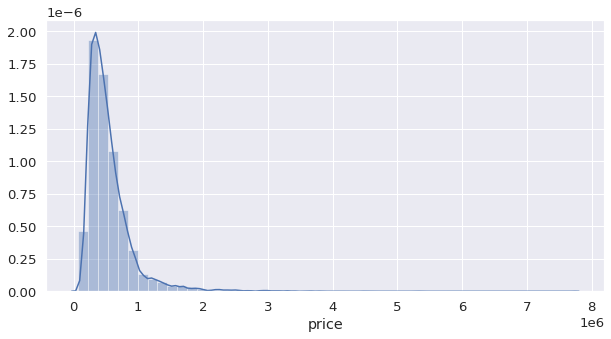

In [15]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(main_data['price'])

In [16]:
#next step is to divide the data into “attributes” and “labels”. 
#X variable contains all the attributes/features and y variable contains labels.
features=['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','condition','grade' ,'sqft_living']
df_x = main_data[features]
df_y=main_data['price']

# we split 90% of the data to the training set while 10% of the data to test set using below code and find out the how the samples are divided
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.3, random_state=3)
print("number of training samples:",x_train.shape[0])
print("number of testing samples:", x_test.shape[0])

number of training samples: 15129
number of testing samples: 6484


In [17]:
#Lets train our model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#  the regression model has to find the most optimal coefficients for all the attributes. Lets see!
coeff_df = pd.DataFrame(reg.coef_, df_x.columns, columns=['Coefficient'])  
coeff_df


,Coefficient
floors,-1.204332e+04
waterfront,5.545648e+05
lat,6.703916e+05
bedrooms,-2.722270e+04
sqft_basement,3.376357e+15
view,6.803170e+04
bathrooms,-3.565965e+03
sqft_living15,1.024468e+01
sqft_above,3.376357e+15
condition,5.662177e+04


In [19]:
#now lets redict using the testing data
y_pred = reg.predict(x_test)
y_pred
reg.score(x_test,y_test)
# lets take view at actual and predicted value
#from sklearn.linear_model import Ridge
#RigeModel=Ridge(alpha=0.1)
#RigeModel.fit(x_train, y_train)
#lm3 = LinearRegression()
#lm3.fit(x_test[features],y_test)
#lm3.score(x_test,y_test)


0.6736231553248658

In [20]:
# we see that the accuracy of the model is 67.3%. Lets try with gradient boost model
from sklearn.ensemble import GradientBoostingRegressor
reg1=GradientBoostingRegressor(random_state=2)
reg1.fit(x_train,y_train)
pred=reg1.predict(x_test)
reg1.score(x_test,y_test)

0.8255888009613537

In [62]:
#we got 82.5% accuracy which seems to be good!
print("Top 15 predicted values are as follows: ", pred[0:10].reshape(-1,1))

Top 15 predicted values are as follows:  [[ 390767.1659416 ]
 [1079826.59627515]
 [ 820012.53970861]
 [ 209858.57835912]
 [ 397122.19221014]
 [ 563965.32179255]
 [ 225288.41686446]
 [ 605964.06220369]
 [ 396506.92851912]
 [ 379890.38588881]]
